In [2]:
import pandas as pd

# تحديد المسار إلى الملف الخاص بك
file_path = '/content/OnlineRetail.csv'

# قراءة البيانات من الملف
data = pd.read_csv(file_path, encoding='latin1')

# عرض البيانات بتنسيق مشابه للصورة
# تحديد الأعمدة المطلوبة (InvoiceNo, InvoiceDate, Description)
data_subset = data[['InvoiceNo', 'InvoiceDate', 'Description']]

# عرض أول 5 صفوف من البيانات كـ DataFrame منسق
from IPython.display import display
display(data_subset.head())




,InvoiceNo,InvoiceDate,Description
0,536365,12/1/2010 8:26,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,12/1/2010 8:26,WHITE METAL LANTERN
2,536365,12/1/2010 8:26,CREAM CUPID HEARTS COAT HANGER
3,536365,12/1/2010 8:26,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,12/1/2010 8:26,RED WOOLLY HOTTIE WHITE HEART.


In [3]:
#  data_cleaned حذف الصفوف التي تحتوي على أي قيمة مفقودة و خزنتها فمتغير
data_cleaned = data.dropna()

# عرض عدد الصفوف بعد الحذف
print(f"عدد الصفوف بعد حذف القيم المفقودة: {len(data_cleaned)}")

# drop duplicate
data.drop_duplicates(inplace=True)

عدد الصفوف بعد حذف القيم المفقودة: 376551


In [4]:
# Assuming 'data' is your DataFrame, and 'InvoiceDate' is the column with dates
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%d/%m/%Y %H:%M', errors='coerce')

# Add 'year', 'month', 'day', and 'day_name' columns
data['year'] = data['InvoiceDate'].dt.year
data['month'] = data['InvoiceDate'].dt.month
data['day'] = data['InvoiceDate'].dt.day
data['day_name'] = data['InvoiceDate'].dt.day_name()

# Display the updated DataFrame
display(data.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,day_name
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010.0,1.0,12.0,Tuesday
1,536365,71053,WHITE METAL LANTERN,6.0,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010.0,1.0,12.0,Tuesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010.0,1.0,12.0,Tuesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010.0,1.0,12.0,Tuesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010.0,1.0,12.0,Tuesday


In [5]:
# Grouping by CustomerID, InvoiceDate, and Description, and counting the items
item_count = data.groupby(['CustomerID', 'InvoiceDate', 'Description'])['Description'].count().reset_index(name='Count')

# Displaying the first 10 rows of the resulting DataFrame
item_count.head(10)

,CustomerID,InvoiceDate,Description,Count
0,12347.0,2010-07-12 14:57:00,3D DOG PICTURE PLAYING CARDS,1
1,12347.0,2010-07-12 14:57:00,AIRLINE BAG VINTAGE JET SET BROWN,1
2,12347.0,2010-07-12 14:57:00,ALARM CLOCK BAKELIKE CHOCOLATE,1
3,12347.0,2010-07-12 14:57:00,ALARM CLOCK BAKELIKE GREEN,1
4,12347.0,2010-07-12 14:57:00,ALARM CLOCK BAKELIKE ORANGE,1
5,12347.0,2010-07-12 14:57:00,ALARM CLOCK BAKELIKE PINK,1
6,12347.0,2010-07-12 14:57:00,ALARM CLOCK BAKELIKE RED,1
7,12347.0,2010-07-12 14:57:00,BATHROOM METAL SIGN,1
8,12347.0,2010-07-12 14:57:00,BLACK CANDELABRA T-LIGHT HOLDER,1
9,12347.0,2010-07-12 14:57:00,BLACK EAR MUFF HEADPHONES,1


In [6]:
# إنشاء الجدول المحوري بناءً على البيانات
item_count_pivot = data.pivot_table(index='InvoiceNo',
                                    columns='Description',
                                    values='Quantity',
                                    aggfunc='sum').fillna(0)

# عرض الجدول المحوري داخل DataFrame
item_count_pivot.head(10)

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# drop comma
item_count_pivot = item_count_pivot.astype('int32')
item_count_pivot.head(10)

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536370,0,0,0,0,0,0,0,0,24,0,...,0,0,0,0,0,0,0,0,0,0
536371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from mlxtend.frequent_patterns import apriori, association_rules
# تحويل البيانات إلى صيغة السلة
basket = data.groupby('InvoiceNo')['Description'].apply(list).reset_index()

# ترميز العناصر باستخدام get_dummies لتشكيل مصفوفة 0 و 1
basket_encoded = basket['Description'].str.join('|').str.get_dummies('|')

# عرض أول 5 صفوف في DataFrame
basket_encoded.head(5)

,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
from mlxtend.frequent_patterns import fpgrowth
from google.colab import drive

# تنظيف البيانات من القيم المفقودة
data_cleaned = data.dropna(subset=['InvoiceNo', 'Description', 'Quantity'])

# تحويل البيانات إلى صيغة السلة (Basket Format)
basket = data_cleaned.groupby('InvoiceNo')['Description'].apply(list).reset_index()

# ترميز العناصر باستخدام get_dummies لتشكيل مصفوفة 0 و 1
basket_encoded = basket['Description'].str.join('|').str.get_dummies('|')

# تطبيق FP-Growth على البيانات المرمزة
frequent_itemsets = fpgrowth(basket_encoded, min_support=0.01, use_colnames=True)

# فرز العناصر المتكررة حسب الدعم (support) وعرض أعلى 10 نتائج
frequent_itemsets.sort_values('support', ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.095868,(WHITE HANGING HEART T-LIGHT HOLDER)
269,0.090435,(REGENCY CAKESTAND 3 TIER)
90,0.088814,(JUMBO BAG RED RETROSPOT)
468,0.072821,(PARTY BUNTING)
40,0.067038,(LUNCH BAG RED RETROSPOT)
7,0.060728,(ASSORTED COLOUR BIRD ORNAMENT)
491,0.060509,(SET OF 3 CAKE TINS PANTRY DESIGN )
41,0.055821,(PACK OF 72 RETROSPOT CAKE CASES)
162,0.053367,(LUNCH BAG BLACK SKULL.)
77,0.051965,(NATURAL SLATE HEART CHALKBOARD )


In [10]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules

# تطبيق FP-Growth على البيانات المرمزة (basket_encoded) باستخدام حد أدنى للدعم 0.01
frequent_itemsets = fpgrowth(basket_encoded, min_support=0.01, use_colnames=True)

# استخراج قواعد الارتباط باستخدام association_rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.5)

# عرض القواعد مع الأعمدة المطلوبة
top_rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values('confidence', ascending=False).head(10)

# تنسيق الأعمدة وجعل المخرجات تظهر بالشكل المناسب
top_rules['antecedents'] = top_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
top_rules['consequents'] = top_rules['consequents'].apply(lambda x: ', '.join(list(x)))

# عرض النتائج في شكل DataFrame باستخدام display
import pandas as pd
from IPython.display import display

# عرض النتائج
display(top_rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,support,confidence,lift
1445,"REGENCY TEA PLATE PINK, REGENCY TEA PLATE ROSES",REGENCY TEA PLATE GREEN,0.010603,0.960317,60.378307
1446,"REGENCY TEA PLATE GREEN , REGENCY TEA PLATE PINK",REGENCY TEA PLATE ROSES,0.010603,0.927203,49.212920
1441,REGENCY TEA PLATE PINK,REGENCY TEA PLATE GREEN,0.011436,0.909408,57.177441
1138,"ROSES REGENCY TEACUP AND SAUCER , REGENCY CAKE...",GREEN REGENCY TEACUP AND SAUCER,0.012225,0.894231,20.409029
1151,"ROSES REGENCY TEACUP AND SAUCER , PINK REGENCY...",GREEN REGENCY TEACUP AND SAUCER,0.022390,0.893357,20.389079
386,"SET/20 RED RETROSPOT PAPER NAPKINS , SET/6 RED...",SET/6 RED SPOTTY PAPER PLATES,0.011348,0.893103,39.733528
1443,REGENCY TEA PLATE PINK,REGENCY TEA PLATE ROSES,0.011041,0.878049,46.603971
1139,"GREEN REGENCY TEACUP AND SAUCER, REGENCY CAKES...",ROSES REGENCY TEACUP AND SAUCER,0.012225,0.877358,18.784196
299,"JUMBO STORAGE BAG SUKI, JUMBO SHOPPER VINTAGE ...",JUMBO BAG RED RETROSPOT,0.011217,0.867797,9.770953
239,"CHARLOTTE BAG SUKI DESIGN, STRAWBERRY CHARLOTT...",RED RETROSPOT CHARLOTTE BAG,0.010647,0.864769,19.875746


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


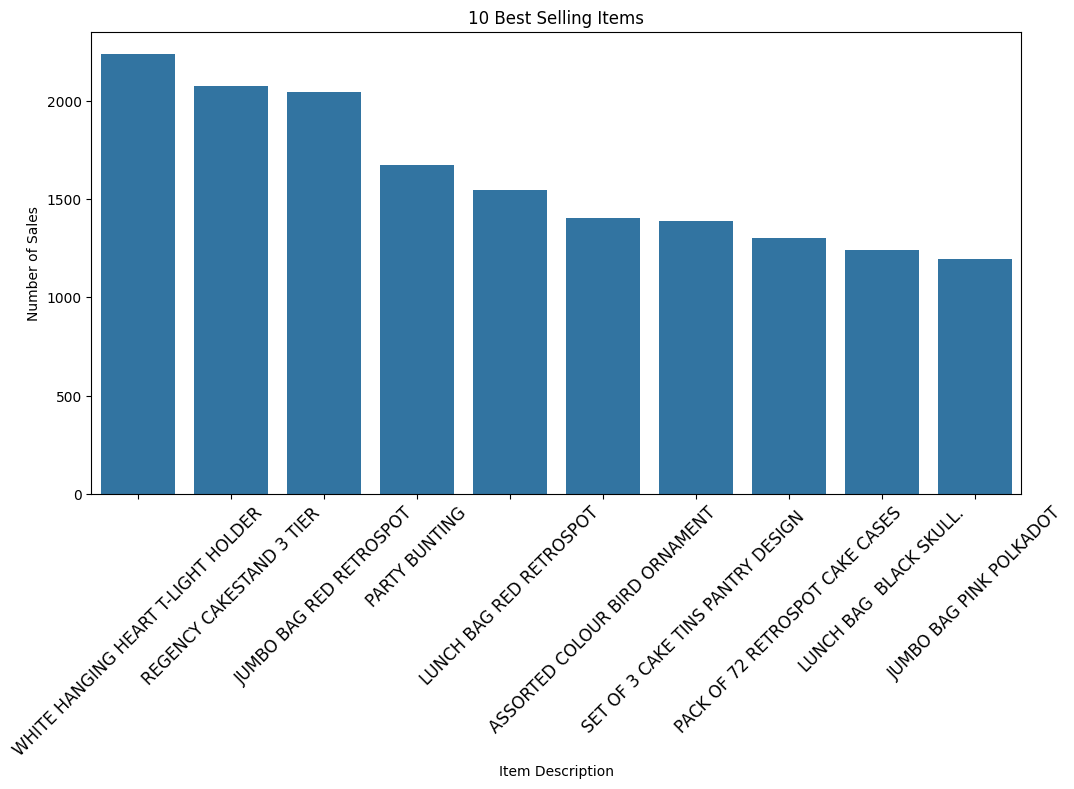

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the top 10 best-selling items
plt.figure(figsize=(12,6))

# Adjust column name to 'Description' if necessary
sns.barplot(x=data['Description'].value_counts()[:10].index,
            y=data['Description'].value_counts()[:10].values)

# Customize the plot
plt.xticks(size=12, rotation=45)
plt.title('10 Best Selling Items')
plt.xlabel('Item Description')
plt.ylabel('Number of Sales')

# Display the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


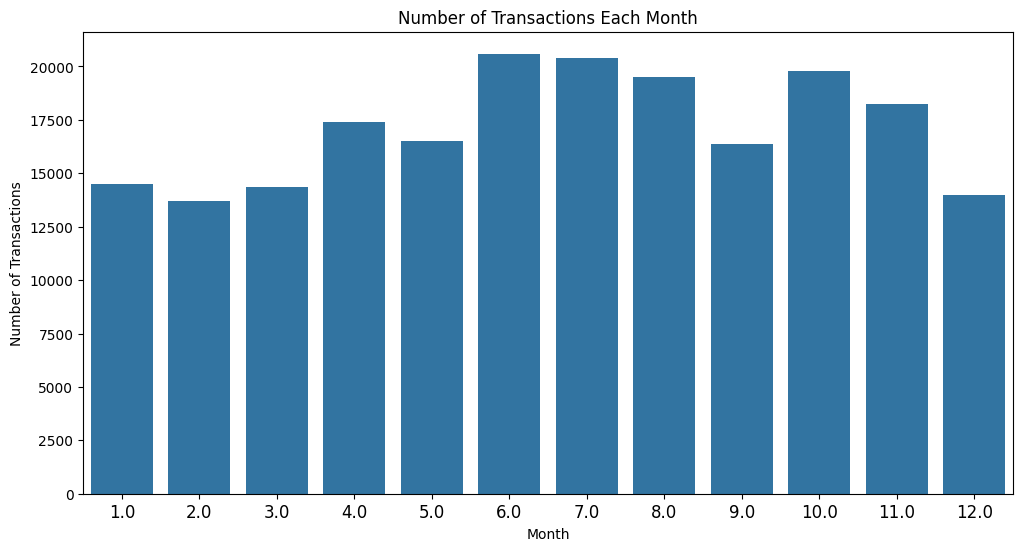

In [12]:
# Assuming 'data' is your DataFrame, and 'InvoiceDate' is the column with dates
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%d/%m/%Y %H:%M', errors='coerce')

# Add 'year', 'month', 'day', and 'day_name' columns
data['year'] = data['InvoiceDate'].dt.year
data['month'] = data['InvoiceDate'].dt.month
data['day'] = data['InvoiceDate'].dt.day
data['day_name'] = data['InvoiceDate'].dt.day_name()

# ... (Now you can use the plotting code from ipython-input-8-6df53657d6e8) ...

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'month' column has already been created in your DataFrame (from previous datetime operations)
plt.figure(figsize=(12,6))

# Plotting the number of transactions per month
sns.barplot(x=data['month'].value_counts().index,
            y=data['month'].value_counts().values)

# Customize the plot
plt.xticks(size=12)
plt.title('Number of Transactions Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')

# Display the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


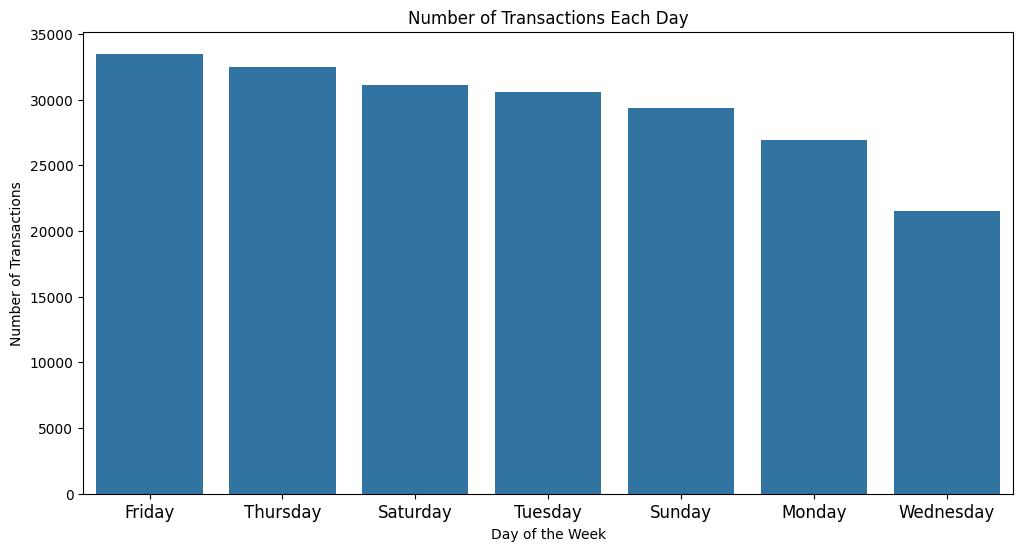

In [13]:
# Assuming 'day_name' column has already been created in your DataFrame (from previous datetime operations)
plt.figure(figsize=(12,6))

# Plotting the number of transactions per day
sns.barplot(x=data['day_name'].value_counts().index,
            y=data['day_name'].value_counts().values)

# Customize the plot
plt.xticks(size=12)
plt.title('Number of Transactions Each Day')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')

# Display the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='day_name'>

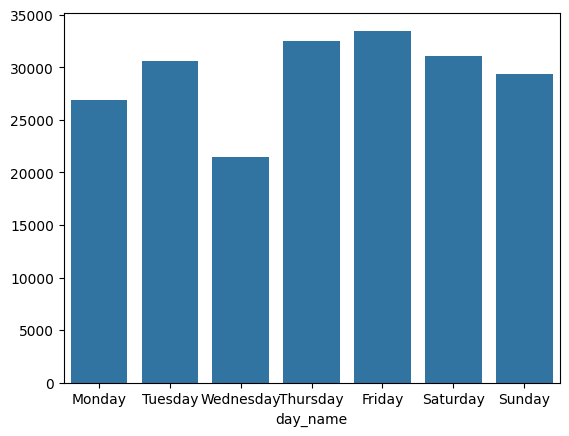

In [14]:
# Sorting days by the correct weekday order
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x=data['day_name'].value_counts().reindex(order).index,
            y=data['day_name'].value_counts().reindex(order).values)